In [524]:
import pandas as pd
import matplotlib.pyplot as plt
from pandas.plotting import scatter_matrix
from sklearn.model_selection import train_test_split
import numpy as np

#Extracting the "Occupancy Detection" data from the .txt file
dataset = pd.read_csv("datatraining.txt", sep=",", index_col = 0) # Use the first column (indexed 0) as the index of the rows
dataset.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 8143 entries, 1 to 8143
Data columns (total 7 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   date           8143 non-null   object 
 1   Temperature    8143 non-null   float64
 2   Humidity       8143 non-null   float64
 3   Light          8143 non-null   float64
 4   CO2            8143 non-null   float64
 5   HumidityRatio  8143 non-null   float64
 6   Occupancy      8143 non-null   int64  
dtypes: float64(5), int64(1), object(1)
memory usage: 508.9+ KB


In [525]:
#Converting date variable from object to datetime64
dataset['date'] = pd.to_datetime(dataset.date)
dataset.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 8143 entries, 1 to 8143
Data columns (total 7 columns):
 #   Column         Non-Null Count  Dtype         
---  ------         --------------  -----         
 0   date           8143 non-null   datetime64[ns]
 1   Temperature    8143 non-null   float64       
 2   Humidity       8143 non-null   float64       
 3   Light          8143 non-null   float64       
 4   CO2            8143 non-null   float64       
 5   HumidityRatio  8143 non-null   float64       
 6   Occupancy      8143 non-null   int64         
dtypes: datetime64[ns](1), float64(5), int64(1)
memory usage: 508.9 KB


In [526]:
#Due to limited variance in date, we only care about day and hour.
dataset['day'] = dataset.date.dt.weekday
dataset['date'] = dataset.date.dt.hour
dataset.rename(columns={'date':'hour'}, inplace=True)
dataset.head(None)

hour  Temperature   Humidity        Light          CO2  HumidityRatio  \
1       17    23.180000  27.272000   426.000000   721.250000       0.004793   
2       17    23.150000  27.267500   429.500000   714.000000       0.004783   
3       17    23.150000  27.245000   426.000000   713.500000       0.004779   
4       17    23.150000  27.200000   426.000000   708.250000       0.004772   
5       17    23.100000  27.200000   426.000000   704.500000       0.004757   
6       17    23.100000  27.200000   419.000000   701.000000       0.004757   
7       17    23.100000  27.200000   419.000000   701.666667       0.004757   
8       17    23.100000  27.200000   419.000000   699.000000       0.004757   
9       17    23.100000  27.200000   419.000000   689.333333       0.004757   
10      18    23.075000  27.175000   419.000000   688.000000       0.004745   
11      18    23.075000  27.150000   419.000000   690.250000       0.004741   
12      18    23.100000  27.100000   419.000000   691.000000       0.004739   
13      18    23.100000  27.166667   419.000000   683.500000       0.004751   
14      18    23.050000  27.150000   419.000000   687.500000       0.004734   
15      18    23.000000  27.125000   419.000000   686.000000       0.004715   
16      18    23.000000  27.125000   418.500000   680.500000       0.004715   
17      18    23.000000  27.200000     0.000000   681.500000       0.004728   
18      18    22.945000  27.290000     0.000000   685.000000       0.004728   
19      18    22.945000  27.390000     0.000000   685.000000       0.004745   
20      18    22.890000  27.390000     0.000000   689.000000       0.004730   
21      18    22.890000  27.390000     0.000000   689.500000       0.004730   
22      18    22.890000  27.390000     0.000000   689.000000       0.004730   
23      18    22.890000  27.445000     0.000000   691.000000       0.004739   
24      18    22.890000  27.500000     0.000000   688.000000       0.004749   
25      18    22.890000  27.500000     0.000000   689.500000       0.004749   
26      18    22.790000  27.445000     0.000000   689.000000       0.004710   
27      18    22.790000  27.500000     0.000000   685.666667       0.004720   
28      18    22.790000  27.500000     0.000000   687.000000       0.004720   
29      18    22.790000  27.500000     0.000000   688.000000       0.004720   
30      18    22.745000  27.500000     0.000000   670.000000       0.004707   
31      18    22.700000  27.463333     0.000000   668.666667       0.004688   
32      18    22.700000  27.500000     0.000000   670.000000       0.004694   
33      18    22.700000  27.500000     0.000000   667.000000       0.004694   
34      18    22.666667  27.426667     0.000000   664.500000       0.004672   
35      18    22.700000  27.600000     0.000000   670.000000       0.004711   
36      18    22.600000  27.426667     0.000000   670.333333       0.004653   
37      18    22.600000  27.390000     0.000000   672.000000       0.004646   
38      18    22.600000  27.356667     0.000000   658.000000       0.004641   
39      18    22.600000  27.445000     0.000000   660.500000       0.004656   
40      18    22.600000  27.426667     0.000000   658.000000       0.004653   
41      18    22.600000  27.445000     0.000000   655.000000       0.004656   
42      18    22.600000  27.445000     0.000000   654.250000       0.004656   
43      18    22.600000  27.390000     0.000000   648.000000       0.004646   
44      18    22.500000  27.323333     0.000000   648.666667       0.004607   
45      18    22.500000  27.445000     0.000000   646.000000       0.004627   
46      18    22.500000  27.500000     0.000000   646.000000       0.004637   
47      18    22.500000  27.445000     0.000000   641.500000       0.004627   
48      18    22.390000  27.290000     0.000000   639.000000       0.004570   
49      18    22.500000  27.500000     0.000000   640.000000       0.004637   
50      18    22.390000  27.340000     0.000000   630.50

In [527]:
dataset.describe()

hour  Temperature     Humidity        Light          CO2  \
count  8143.000000  8143.000000  8143.000000  8143.000000  8143.000000   
mean     11.390642    20.619084    25.731507   119.519375   606.546243   
std       7.092195     1.016916     5.531211   194.755805   314.320877   
min       0.000000    19.000000    16.745000     0.000000   412.750000   
25%       5.000000    19.700000    20.200000     0.000000   439.000000   
50%      11.000000    20.390000    26.222500     0.000000   453.500000   
75%      18.000000    21.390000    30.533333   256.375000   638.833333   
max      23.000000    23.180000    39.117500  1546.333333  2028.500000   

       HumidityRatio    Occupancy          day  
count    8143.000000  8143.000000  8143.000000  
mean        0.003863     0.212330     3.344222  
std         0.000852     0.408982     2.067996  
min         0.002674     0.000000     0.000000  
25%         0.003078     0.000000     2.000000  
50%         0.003801     0.000000     4.000000  
75%         0.004352     0.000000     5.000000  
max         0.006476     1.000000     6.000000

In [528]:
dataset.head()

hour  Temperature  Humidity  Light     CO2  HumidityRatio  Occupancy  day
1    17        23.18   27.2720  426.0  721.25       0.004793          1    2
2    17        23.15   27.2675  429.5  714.00       0.004783          1    2
3    17        23.15   27.2450  426.0  713.50       0.004779          1    2
4    17        23.15   27.2000  426.0  708.25       0.004772          1    2
5    17        23.10   27.2000  426.0  704.50       0.004757          1    2

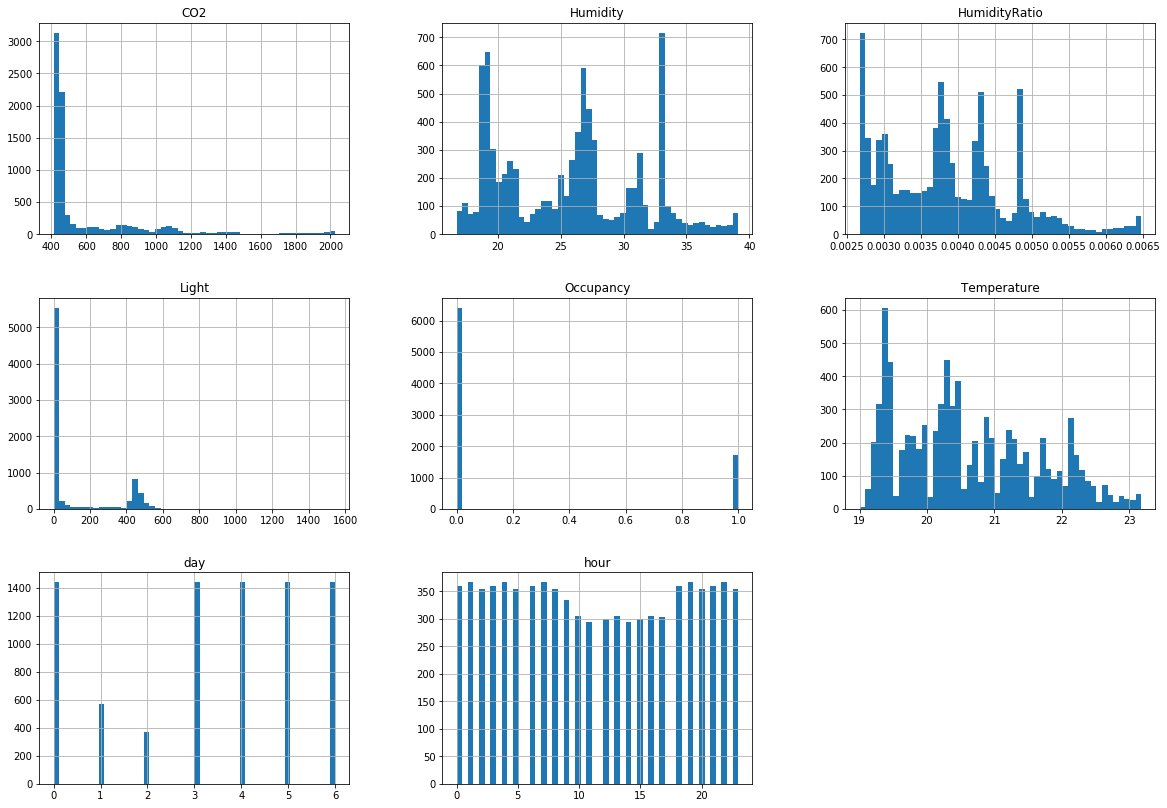

In [529]:
#Histogram of the dataset
dataset.hist(bins=50, figsize=(20.0, 14.0))
plt.show()

In [530]:
dataset.var()

hour             5.029923e+01
Temperature      1.034119e+00
Humidity         3.059430e+01
Light            3.792982e+04
CO2              9.879761e+04
HumidityRatio    7.264686e-07
Occupancy        1.672663e-01
day              4.276608e+00
dtype: float64

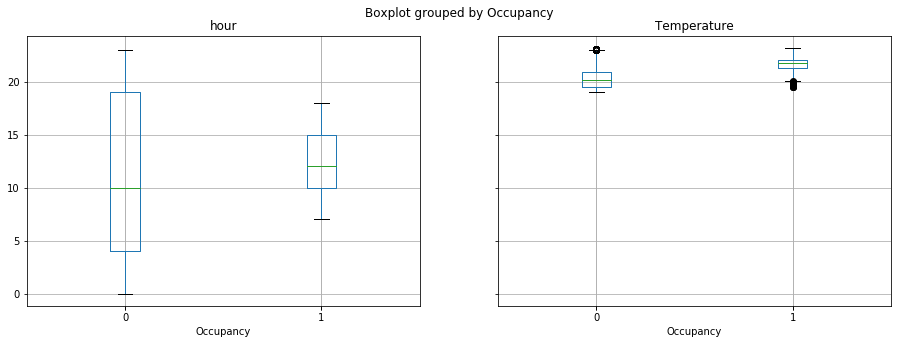

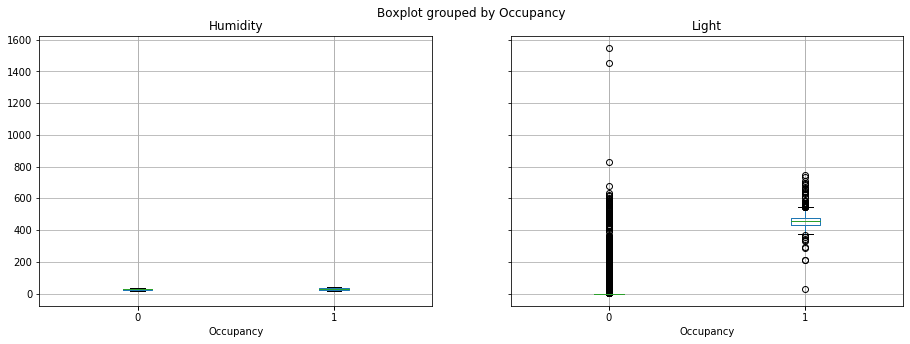

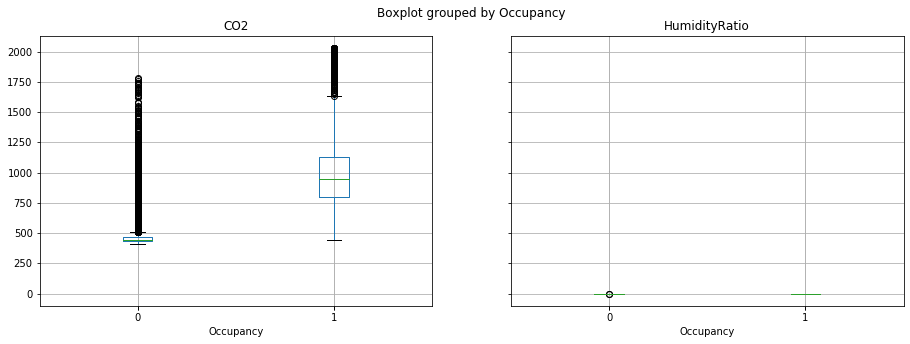

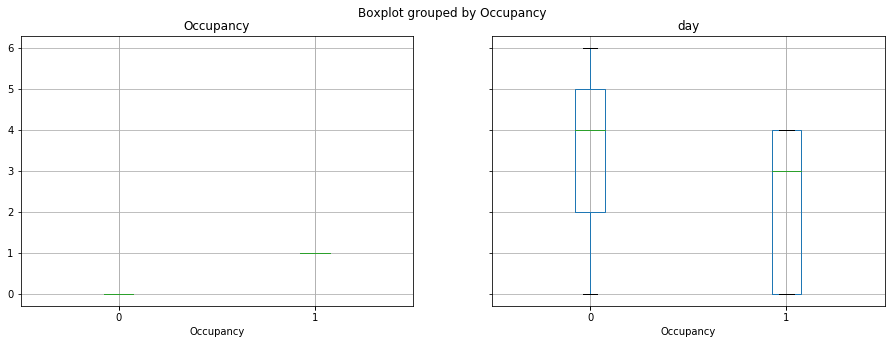

In [531]:
#Visualizing the dataset
#Boxplot of each of the variables grouped by Occupancy
import matplotlib.axes as axs

for i in range(0, 7, 2): 
    dataset.boxplot(column=[dataset.columns[i], dataset.columns[i+1]], by='Occupancy', figsize=(15, 5))

In [532]:
#Looking at the date data to see if it is useful in predicting occupancy.
corr_matrix = dataset.corr()
corr_matrix["Occupancy"].sort_values(ascending=False)

Occupancy        1.000000
Light            0.907352
CO2              0.712235
Temperature      0.538220
HumidityRatio    0.300282
Humidity         0.132964
hour             0.079630
day             -0.251973
Name: Occupancy, dtype: float64

In [543]:
#Deleted day variable due to bad correlation with occupancy
del dataset['day']

KeyError: 'day'

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x155a3d090>,
      dtype=object)

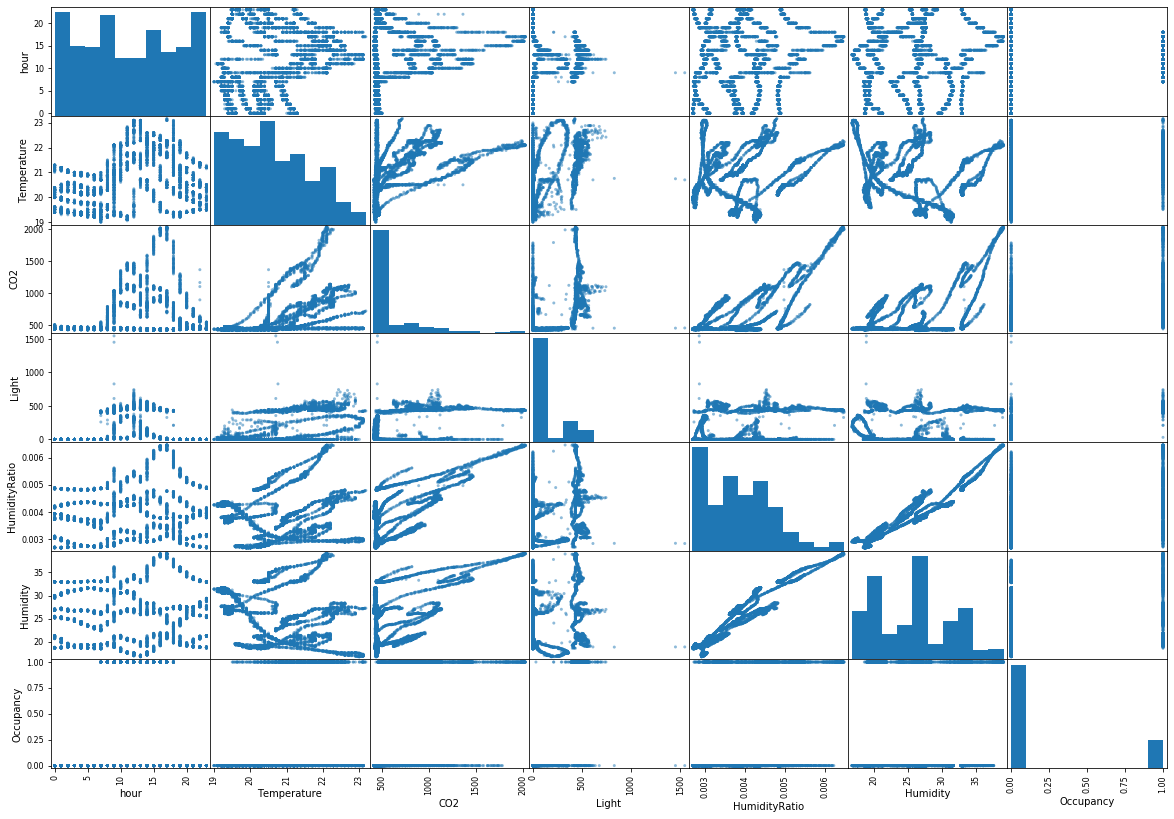

In [534]:
#Creating a scatter matrix containing all of the variables.
from pandas.plotting import scatter_matrix

attributes = ["hour", "Temperature", "CO2", "Light", "HumidityRatio", "Humidity", "Occupancy"]
scatter_matrix(dataset[attributes], figsize=(20.0, 14.0))

In [535]:
#Creating the test set
train_set, test_set = train_test_split(dataset, test_size=0.2, random_state=42)
print(train_set["Occupancy"].value_counts()/len(train_set))
print(test_set["Occupancy"].value_counts()/len(test_set))

0    0.787228
1    0.212772
Name: Occupancy, dtype: float64
0    0.789441
1    0.210559
Name: Occupancy, dtype: float64


In [536]:
#Calculating the correlation between Occupancy and each of the other variables
corr_matrix = dataset.corr()
corr_matrix["Occupancy"].sort_values(ascending=False)

Occupancy        1.000000
Light            0.907352
CO2              0.712235
Temperature      0.538220
HumidityRatio    0.300282
Humidity         0.132964
hour             0.079630
Name: Occupancy, dtype: float64

In [537]:
#Check if data has missing values
pd.set_option('display.max_rows', None)
print(dataset.isna())
dataset.head()

       hour  Temperature  Humidity  Light    CO2  HumidityRatio  Occupancy
1     False        False     False  False  False          False      False
2     False        False     False  False  False          False      False
3     False        False     False  False  False          False      False
4     False        False     False  False  False          False      False
5     False        False     False  False  False          False      False
6     False        False     False  False  False          False      False
7     False        False     False  False  False          False      False
8     False        False     False  False  False          False      False
9     False        False     False  False  False          False      False
10    False        False     False  False  False          False      False
11    False        False     False  False  False          False      False
12    False        False     False  False  False          False      False
13    False        False 

hour  Temperature  Humidity  Light     CO2  HumidityRatio  Occupancy
1    17        23.18   27.2720  426.0  721.25       0.004793          1
2    17        23.15   27.2675  429.5  714.00       0.004783          1
3    17        23.15   27.2450  426.0  713.50       0.004779          1
4    17        23.15   27.2000  426.0  708.25       0.004772          1
5    17        23.10   27.2000  426.0  704.50       0.004757          1

In [538]:
#Splitting up my predictors from my output variable "Occupancy"
y_train = train_set["Occupancy"].copy()
y_test = test_set["Occupancy"].copy()
X_train = train_set.drop("Occupancy", axis=1)
X_test = test_set.drop("Occupancy", axis=1)

In [539]:
#Logistic Regression model
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import mean_squared_error, r2_score, confusion_matrix

clf = LogisticRegression(random_state=0, max_iter=1000).fit(X_train, y_train)
predLogReg = clf.predict(X_test)
print("Coefficients: " + (str)(clf.coef_))
print("MSE: " + (str) (mean_squared_error(y_test, predLogReg)*100) + "%")
print("R^2 Error: " + (str)(r2_score(y_test, predLogReg)) + "\n")
cmat = confusion_matrix(y_test, predLogReg)
print("No occupant accuracy: " + str(((cmat[0][0]-cmat[1][0])/(cmat[0][0]+cmat[1][0]))*100) + "%")
print("Occupant accuracy: " + str(((cmat[1][1]-cmat[0][1])/(cmat[0][1]+cmat[1][1]))*100) + "%")
print("Total accuracy: " + str(((cmat[0][0]+cmat[1][1])/(cmat[0][0]+cmat[1][0]+cmat[0][1]+cmat[1][1]))*100) + "%")

Coefficients: [[-5.75019556e-02 -4.86096924e-01  3.81183246e-02  1.92723697e-02
   4.91510789e-03 -1.07373750e-05]]
MSE: 1.1663597298956414%
R^2 Error: 0.929831919437404

No occupant accuracy: 100.0%
Occupant accuracy: 89.50276243093923%
Total accuracy: 98.83364027010437%


In [540]:
#KNN model that finds that k=5 generates the best result
from sklearn import neighbors

knn = neighbors.KNeighborsClassifier(n_neighbors=5)
knn.fit(X_train, y_train)
predKNN = knn.predict(X_test)
mse.append(mean_squared_error(y_test, predKNN))
r2.append(r2_score(y_test, predKNN))
print("K = " + str(5))
print("MSE: " + str(mean_squared_error(y_test, predKNN)*100) + "%")
print("R^2 Error: " + (str)(r2_score(y_test, predKNN)))
cmat = confusion_matrix(y_test, predKNN)
print("No occupant accuracy: " + str(((cmat[0][0]-cmat[1][0])/(cmat[0][0]+cmat[1][0]))*100) + "%")
print("Occupant accuracy: " + str(((cmat[1][1]-cmat[0][1])/(cmat[0][1]+cmat[1][1]))*100) + "%")
print("Total accuracy: " + str(((cmat[0][0]+cmat[1][1])/(cmat[0][0]+cmat[1][0]+cmat[0][1]+cmat[1][1]))*100) + "%")

K = 5
MSE: 1.043585021485574%
R^2 Error: 0.9372180331808351
No occupant accuracy: 99.68578161822467%
Occupant accuracy: 91.57303370786516%
Total accuracy: 98.95641497851443%


In [541]:
#Random Forest
from sklearn.ensemble import RandomForestClassifier
rf = RandomForestClassifier(max_depth=2, random_state=0, bootstrap=False)
rf.fit(X_train, y_train)
predRF = rf.predict(X_test)
print("MSE: " + (str) (mean_squared_error(y_test, predRF)*100) + "%")
print("R^2 Error: " + (str)(r2_score(y_test, predRF)))
cmat = confusion_matrix(y_test, predRF)
print("No occupant accuracy: " + str(((cmat[0][0]-cmat[1][0])/(cmat[0][0]+cmat[1][0]))*100) + "%")
print("Occupant accuracy: " + str(((cmat[1][1]-cmat[0][1])/(cmat[0][1]+cmat[1][1]))*100) + "%")
print("Total accuracy: " + str(((cmat[0][0]+cmat[1][1])/(cmat[0][0]+cmat[1][0]+cmat[0][1]+cmat[1][1]))*100) + "%")

MSE: 1.1663597298956414%
R^2 Error: 0.929831919437404
No occupant accuracy: 99.6852871754524%
Occupant accuracy: 90.5027932960894%
Total accuracy: 98.83364027010437%


In [542]:
#Linear Discriminant Analysis & Quadratic Discriminant Analysis
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis, QuadraticDiscriminantAnalysis

#LDA
lda = LinearDiscriminantAnalysis()
lda.fit(X_train, y_train)
predLDA = lda.predict(X_test)
print("LDA:")
print("MSE: " + (str) (mean_squared_error(y_test, predLDA)*100) + "%")
print("R^2 Error: " + (str)(r2_score(y_test, predLDA)))
cmat = confusion_matrix(y_test, predLDA)
print("No occupant accuracy: " + str(((cmat[0][0]-cmat[1][0])/(cmat[0][0]+cmat[1][0]))*100) + "%")
print("Occupant accuracy: " + str(((cmat[1][1]-cmat[0][1])/(cmat[0][1]+cmat[1][1]))*100) + "%")
print("Total accuracy: " + str(((cmat[0][0]+cmat[1][1])/(cmat[0][0]+cmat[1][0]+cmat[0][1]+cmat[1][1]))*100) + "%\n")

#QDA
qda = QuadraticDiscriminantAnalysis()
qda.fit(X_train, y_train)
predQDA = qda.predict(X_test)
print("QDA:")
print("MSE: " + (str) (mean_squared_error(y_test, predQDA)*100) + "%")
print("R^2 Error: " + (str)(r2_score(y_test, predQDA)))
cmat = confusion_matrix(y_test, predQDA)
print("No occupant accuracy: " + str(((cmat[0][0]-cmat[1][0])/(cmat[0][0]+cmat[1][0]))*100) + "%")
print("Occupant accuracy: " + str(((cmat[1][1]-cmat[0][1])/(cmat[0][1]+cmat[1][1]))*100) + "%")
print("Total accuracy: " + str(((cmat[0][0]+cmat[1][1])/(cmat[0][0]+cmat[1][0]+cmat[0][1]+cmat[1][1]))*100) + "%")

LDA:
MSE: 1.2277470841006752%
R^2 Error: 0.9261388625656883
No occupant accuracy: 100.0%
Occupant accuracy: 88.98071625344353%
Total accuracy: 98.77225291589933%

QDA:
MSE: 1.1663597298956414%
R^2 Error: 0.929831919437404
No occupant accuracy: 100.0%
Occupant accuracy: 89.50276243093923%
Total accuracy: 98.83364027010437%
